Reference: https://colab.research.google.com/github/google/eng-edu/blob/main/ml/testing-debugging/testing-debugging-ml-debugging.ipynb?utm_source=ss-testing-debugging&utm_campaign=colab-external&utm_medium=referral&utm_content=testing-debugging-ml-debugging

Create the dataset

In [2]:
# Reset environment for a new run
%reset -f

# Load Libraries
from os.path import join # for joining file pathnames
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Set Pandas display options
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

In [6]:
features = np.array(range(10))
#print("features 1: ", features)
features = features[:, np.newaxis]
#print("features 2: ", features)
# Create labels by adding noise distributed around 0
labels = features + np.random.random(size=[10,1]) - 0.5

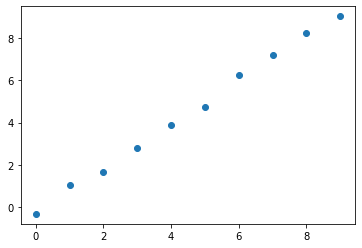

In [7]:
# Visualize the data
plt.scatter(features,labels)

In [33]:
# Delete any existing assignment to "model"
model = None

# Use a sequential model
model = keras.Sequential()

# Add a layer with 1 neuron. Use the popular "tanh" activation function
model.add(keras.layers.Dense(units=1,             # 1 neuron
                             activation='linear',   # 'tanh', 'linear'
                             input_dim=1))         # number of feature cols=1

# Model calculates loss using mean-square error (MSE)
# Model trains using Adam optimizer with learning rate = 0.001
model.compile(optimizer=tf.optimizers.SGD(0.01),
              loss='mse',
             )

print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/3
10/10 [==============================] - 0s 783us/step - loss: 0.0788
Epoch 2/3
10/10 [==============================] - 0s 779us/step - loss: 0.0665
Epoch 3/3
10/10 [==============================] - 0s 855us/step - loss: 0.0447


Text(0.5, 1.0, 'Loss Curves')

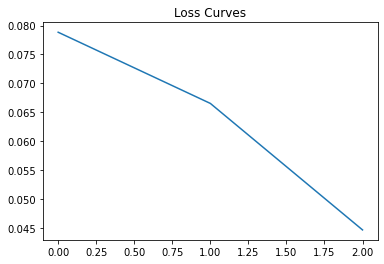

In [35]:
trainHistory = model.fit(x=features,
          y=labels,
          epochs=3,    # train for 10 epochs
          batch_size=1,# use 10 examples per batch
          verbose=1)    # verbose=1 prints progress per epoch
# Plot loss curve
plt.plot(trainHistory.history['loss'])
plt.title('Loss Curves')

1/1 [==============================] - 0s 31ms/step


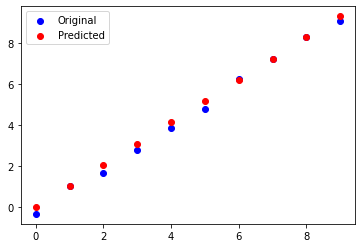

In [36]:
# get predictions
featuresPred = model.predict(features, verbose=1)
# Plot original features and predicted values
featuresPred = np.transpose(featuresPred)
plt.scatter(range(10), labels, c="blue")
plt.scatter(range(10), featuresPred, c="red")
plt.legend(["Original", "Predicted"])